## Análisis de Sentimiento: extracción y comprobación. Uber Reviews

In [1]:
#Inspirado en:https://towardsdatascience.com/uber-reviews-text-analysis-11613675046d
#fuente datos:https://www.kaggle.com/c/tweet-sentiment-extraction/data
#
# **** me interesa para luego *****
# ojo ** https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17
# metodo para limpiar: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
   

### 1. Formulación del proyecto

Propósito: 
Comprender la relación entre las reseñas de texto de Uber y las calificaciones de los viajes. 

Modelo predictivo:
- Carga datos
- Exploración datos
- Logistic Regression Model
- Testing / Conclusions

### 2. Obtener y limpiar datos

In [2]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In c:\users\monrroyy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\monrroyy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\monrroyy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
#pulling in data
df = pd.read_csv(r'Uber_Ride_Reviews.csv')
#df.drop(['sentiment'],axis = 1)
df.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


### 3. Exploración de datos (EDA)

In [4]:
df.describe()

,ride_rating,sentiment
count,1344.000000,1344.000000
mean,1.627232,0.173363
std,1.296149,0.378702
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,5.000000,1.000000


In [5]:
#checking for nulls
null_count = df.isnull().sum()
null_count

ride_review    0
ride_rating    0
sentiment      0
dtype: int64

In [6]:
#seperating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c', 'm']

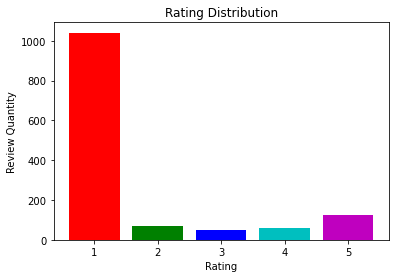

In [7]:
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [8]:
#deleting all instances with ride_rating = 3
df = df[df.ride_rating != 3]

In [9]:
#separating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c']

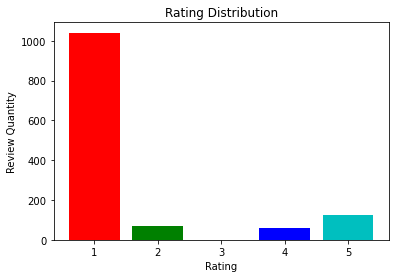

In [10]:
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [11]:
#creating new binary_class column
df['binary_class'] = np.where(df['ride_rating'] > 3, 1, 0)
df

,ride_review,ride_rating,sentiment,binary_class
0,I completed running New York Marathon requeste...,1.0,0,0
1,My appointment time auto repairs required earl...,1.0,0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0,0
5,I damage vehicle due Uber driver upstairs neig...,1.0,0,0
6,I use Uber fairly frequently Overall good serv...,2.0,0,0
7,Last night I returned home airport using Uber ...,1.0,0,0
8,Do lose anything Uber otherwise experience nig...,1.0,0,0
9,My last experiences Uber made use taxis turned...,1.0,0,0


In [12]:
# splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['ride_review'], df['binary_class'], random_state = 0)

#setting random number between 1 and 1000
number = random.randint(1,1000)

#printing random training text and X_train shape
print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
I took UBER Pacific Heights SF airport cost That outrageous I told charge driver picked airport stopped hotel get suitcase airport The traffic bad told crazy
 
X_train shape: (970,)


In [13]:
# Turning words into numbers (BoW)

#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)

#translates numbers back to text
vect.get_feature_names()[1:10]

['abandoned',
 'ability',
 'able',
 'about',
 'abrupt',
 'absence',
 'absolute',
 'absolutely',
 'absorb']

In [14]:
#length of total words
len(vect.get_feature_names())

6607

In [15]:
#creating matrix array for logistic regression
X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 4. Modelado - Logistic Regression

In [16]:
# creating log regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7549863444508814


In [18]:
# This is good. A rough way of understanding this metric is to say we have 75% correctly 
# classified instances.

### 5. Evaluacion del modelo

In [19]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())

#creating array of all the regression coefficients per word
coef_index = model.coef_[0]

#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})

#sorting by coefficient
df.sort_values('Coef')

,Word,Coef
913,charged,-1.008715
3820,never,-0.938884
1364,customer,-0.738470
240,another,-0.684385
3179,know,-0.671529
6075,two,-0.616444
2323,free,-0.600834
3433,lyft,-0.583917
5844,they,-0.560083
793,call,-0.543920


In [20]:
# Testing custom reviews (1 = positive; 0 = negative)
print (model.predict (vect.transform (['it was as average as a trip could be'])))
print (model.predict (vect.transform (['my family felt safe we got to our destination with ease'])))
print (model.predict (vect.transform (['charged slow horrible'])))

[0]
[1]
[0]
